## 딥러닝 기말고사

* 시험시간: 09:00~10:20분까지<br><br>
* 파일이름 작성방법: 딥러닝_기말고사_학번_성명.ipynb<br>
\- 주의사항: jupyternotebook file을 실행해본 후 upload하세요
* 답안지 제출 
   www.webhard.co.kr<br>
   ID: lindsey<br>
   PW: start<br>
   답안제출 Folder: 올리기전용/딥러닝(학부2학년)/딥러닝_기말고사답안제출_폴더"에 답안제출<br><br>
* 빈칸에 프로그램을 작성한 후 실행결과를 제출
* 시험 시간 이후에 upload된 file은 인정하지 않습니다

In [2]:
import tensorflow.compat.v1 as tf1
# import tensorflow as tf2
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"
config = tf1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.05
session = tf1.Session(config=config)

2022-11-07 00:25:58.908639: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-07 00:25:59.822177: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4053 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:b3:00.0, compute capability: 8.0


### Dataset 설명
1. $28 \times 28$ MNIST 손글씨 image 7만장을 다음과 같이 loading하였다
1. 7만장중 6만장은 학습에 사용하고 1만장은 test에 사용함

In [46]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
train_images, test_images = train_images / 255.0, test_images / 255.0

#### [문제 1] 위의 MNIST dataset을 이용하여 다음 Network Architecture를 가지는 epoch = 3으로 Autoencoder를 학습하고 Testdataset의 처음 5개 data에 대해 Original data와 Autoencoder로 생성한 5개 data의 image를 출력하시오

Neural Network | Layer | 설명
:----|:----|:----
Encoder | Convolution layer 1 | $3 \times3$ filter 16장, activation: ReLU, $2 \times 2$ Maxpooling
Encoder | Convolution layer 2 | $3 \times3$ filter  8장, activation: ReLU, $2 \times 2$ Maxpooling
Encoder | Convolution layer 3 | $3 \times3$ filter  2장, activation: ReLU, $2 \times 2$ Maxpooling
Decoder | Convolution layer 1 | $3 \times3$ filter  2장, activation: ReLU, $2 \times 2$ Maxpooling
Decoder | Convolution layer 2 | $3 \times3$ filter  8장, activation: ReLU, $2 \times 2$ Maxpooling
Decoder | Convolution layer 3 | $3 \times3$ filter 16장, activation: ReLU, $2 \times 2$ Maxpooling

In [48]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [49]:
def show_reconstructions(model, images=test_images, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [10]:
import numpy as np

tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(2, activation="relu"),
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(2, activation="relu", input_shape=[2]),
    keras.layers.Dense(8, activation="relu", input_shape=[8]),
    keras.layers.Dense(16, activation="relu", input_shape=[16]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",
                   optimizer=tf.keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])

In [50]:
# input_img = keras.Input(shape=(28, 28, 1))

# x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = layers.MaxPooling2D((2, 2), padding='same')(x)
# x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(x)
# encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# # at this point the representation is (4, 4, 8) i.e. 128-dimensional

# x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = layers.UpSampling2D((2, 2))(x)
# x = layers.Conv2D(16, (3, 3), activation='relu')(x)
# x = layers.UpSampling2D((2, 2))(x)
# decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# autoencoder = keras.Model(input_img, decoded)
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [51]:
history = autoencoder.fit(train_images, train_images, epochs=3,
                        validation_data=(test_images, test_images))

Epoch 1/3
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1998 - val_loss: 0.1658
Epoch 2/3
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1587 - val_loss: 0.1520
Epoch 3/3
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1494 - val_loss: 0.1476


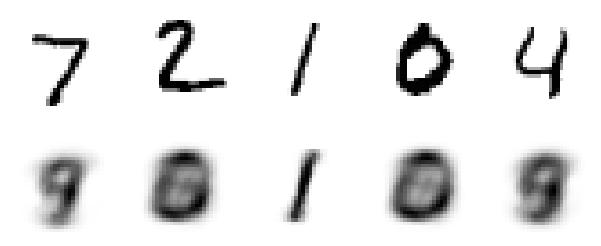

In [37]:
import matplotlib.pyplot as plt

show_reconstructions(stacked_ae)
plt.show()

#### [문제 2] MNIST dataset에서 다음과 같은 각 image에 noise를 추가하였다. Noise를 제거하기 위한 Autoencoder를 실행시키고 Testdataset의 처음 5개 data에 대해 Original data와 Auto Encoder로 생성한 5개 data의 image를 출력하시오. 단, Autoencoder의 Architecture는 문제 1과 같다.

In [39]:
from keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

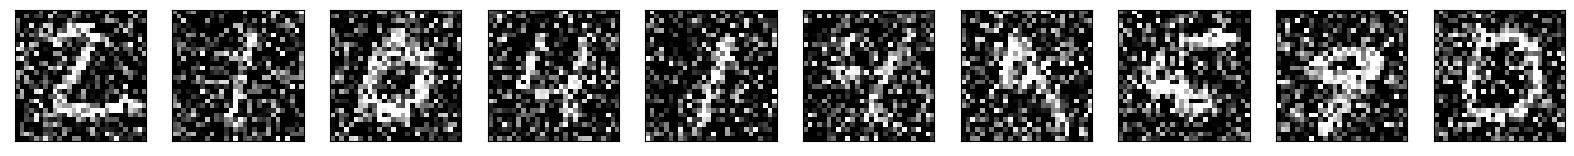

In [40]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [41]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(2, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [43]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=3,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/3
469/469 [==============================] - 6s 13ms/step - loss: 0.1316 - val_loss: 0.1306
Epoch 2/3
469/469 [==============================] - 6s 13ms/step - loss: 0.1308 - val_loss: 0.1297
Epoch 3/3
469/469 [==============================] - 6s 13ms/step - loss: 0.1302 - val_loss: 0.1294


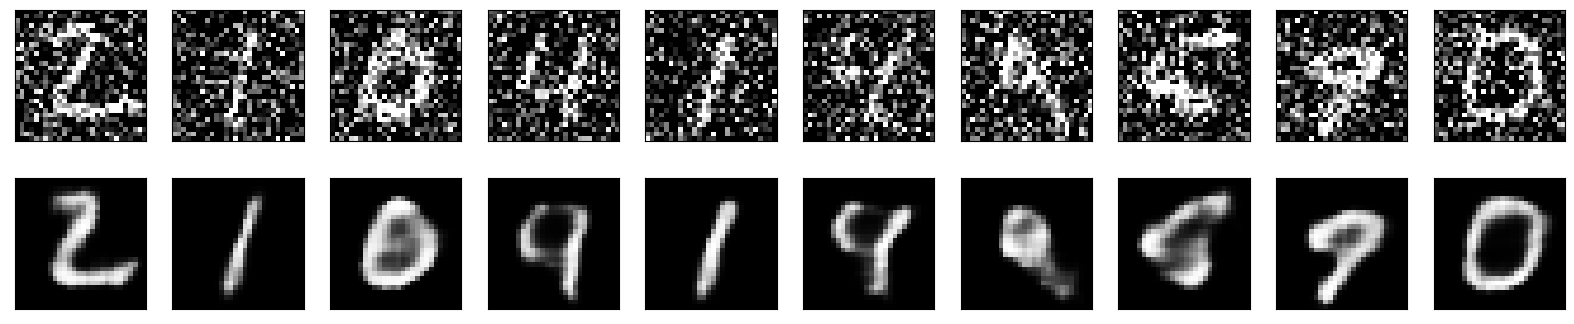

In [44]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### [문제 3] 다음과 같은 data sequence $x$가 있을 때 주어진 data sequence의 label data $y$는 다음과 같다<br>

x = array([[1,2,3], [2,3,4], [3,4,5],  [4,5,6],   [5,6,7],
           [6,7,8], [7,8,9], [8,9,10], [9,10,11], [10,11,12],
           [20,30,40], [30,40,50], [40,50,60]])<br>
           
y =  array([5,6,7,8,9,10,11,12,13,14,60,70,80])

다음과 같은 조건에서 Simple RNN을 사용하여 $x_{new}=[25,35,45]$에 대한 다음 숫자를 예측하시오

- simple RNN layer: 5개
- 1개 Dense layer의 node 수: 10
- output node 수: 1개
- epoch=100<br>
- Activation function: ReLU
- Optimizer: Adam


In [76]:
x = np.array([[1,2,3], [2,3,4], [3,4,5],  [4,5,6],   [5,6,7],
           [6,7,8], [7,8,9], [8,9,10], [9,10,11], [10,11,12],
           [20,30,40], [30,40,50], [40,50,60]])

y =  np.array([5,6,7,8,9,10,11,12,13,14,60,70,80])
x = x[np.newaxis, :, :]
x = np.array(x, dtype=np.float32)

In [77]:
x.shape

(1, 13, 3)

In [80]:
rnn = SimpleRNN(3)
hidden_state = rnn(x)
print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[-1.  1.  1.]], shape: (1, 3)


In [81]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_states = rnn(x)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))

hidden states : [[[-0.14974435  0.91531116  0.9927777 ]
  [-0.92006624  0.9678388   0.9993625 ]
  [-0.92749935  0.9947613   0.9999474 ]
  [-0.94960916  0.996956    0.99999803]
  [-0.9640162   0.99830145  1.        ]
  [-0.97441393  0.9990404   1.        ]
  [-0.9818424   0.9994551   1.        ]
  [-0.9871459   0.99968886  1.        ]
  [-0.99091023  0.9998219   1.        ]
  [-0.9935839   0.9998976   1.        ]
  [-0.99969983  1.          1.        ]
  [-0.9999909   1.          1.        ]
  [-1.          1.          1.        ]]], shape: (1, 13, 3)


#### [문제 4] $28 \times 28$ MNIST dataset에 대해 Variational Autoencoder를 실행하여 2차원 latent  manifold(숫자 image 공간)를 출력하시오

- input: $28 \times 28$ image
- 1개의 layer로 구성된 encoder: 32차원
- Latent layer: 2차원
- 1개의 layer로 구성된 decoder: 32차원
- 모든 layer의 activation function: ReLU
- epoch수; 50
- batch size: 128

In [82]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [83]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [90]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_23 (Conv2D)             (None, 14, 14, 32)   320         ['input_7[0][0]']                
                                                                                                  
 conv2d_24 (Conv2D)             (None, 7, 7, 64)     18496       ['conv2d_23[0][0]']              
                                                                                                  
 flatten_10 (Flatten)           (None, 3136)         0           ['conv2d_24[0][0]']              
                                                                                            

In [85]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_50 (Dense)            (None, 3136)              9408      
                                                                 
 reshape_6 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 28, 28, 1)        289 

In [86]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }


In [91]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=50, batch_size=128)

In [ ]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)

In [ ]:
def plot_label_clusters(vae, data, labels):
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = vae.encoder.predict(data)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=labels)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.show()


(x_train, y_train), _ = keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255

plot_label_clusters(vae, x_train, y_train)

#### [문제 5] 문제 4에서 출력 결과에는 0~9까지의 모든 숫자가 나타나지 않는 이유는 무엇인가 간단히 서술하시오

인코터의 그레이디언트를 역전파하면서 무질서해져서